In [2]:
#To give path to the combined_data file, the file is in the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
##going to the directory where the file is
import os
os.chdir('/content/drive/MyDrive/')


In [ ]:
##Understanding the data given in the file

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("combined_data.csv")

In [ ]:
data.head(10)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
5,0,larry king live at escapenumber escapenumber p...
6,0,michael pobega wrote i'm not sure if it's the ...
7,0,hi i have this error tr sample escapenumber es...
8,1,works gateway world art explore tattooing full...
9,1,upon this account he is not only very cautious...


In [ ]:
data.dtypes


label     int64
text     object
dtype: object

In [ ]:
data.columns


Index(['label', 'text'], dtype='object')

In [ ]:
data.shape

(83448, 2)

In [ ]:
dataset_info = {
    "Number of Rows": len(data),
    "Number of Columns": data.shape[1],
    "Missing Values": data.isnull().sum(),
    "Spam Distribution": data['label'].value_counts(normalize=True) * 100
}

dataset_info, data.describe(include='all')

({'Number of Rows': 83448,
  'Number of Columns': 2,
  'Missing Values': label    0
  text     0
  dtype: int64,
  'Spam Distribution': 1    52.619595
  0    47.380405
  Name: label, dtype: float64},
                label         text
 count   83448.000000        83448
 unique           NaN        83446
 top              NaN  unsubscribe
 freq             NaN            2
 mean        0.526196          NaN
 std         0.499316          NaN
 min         0.000000          NaN
 25%         0.000000          NaN
 50%         1.000000          NaN
 75%         1.000000          NaN
 max         1.000000          NaN)

In [ ]:
###Data Preprocessing

Text(0, 0.5, 'Count')

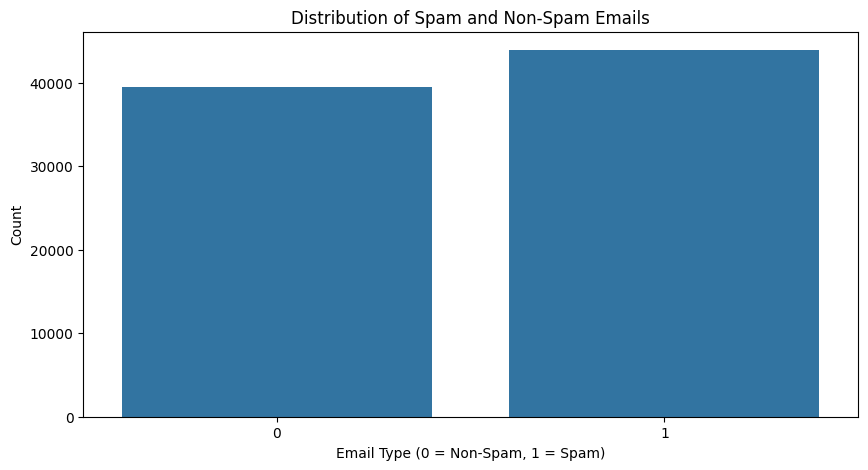

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = data.isnull().sum()      #checking here for the missing values

spam_distribution = data['label'].value_counts()   ## Distribution of spam and non-spam emails

data['text_length'] = data['text'].apply(len)     ## finding basic statistics for text column (like average length of text)
text_stats = data['text_length'].describe()

# Visualization of the distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Email Type (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Count')

In [ ]:
missing_values, spam_distribution, text_stats

(label          0
 text           0
 text_length    0
 dtype: int64,
 1    43910
 0    39538
 Name: label, dtype: int64,
 count     83448.000000
 mean       1662.952725
 std        4178.578068
 min           1.000000
 25%         449.000000
 50%         879.000000
 75%        1861.000000
 max      598705.000000
 Name: text_length, dtype: float64)

In [ ]:
# Basic analysis of the dataset
dataset_info = {
    "Number of Rows": len(data),
    "Number of Columns": data.shape[1],
    "Missing Values": data.isnull().sum(),
    "Spam Distribution": data['label'].value_counts(normalize=True) * 100
}

dataset_info, data.describe(include='all')

({'Number of Rows': 83448,
  'Number of Columns': 3,
  'Missing Values': label          0
  text           0
  text_length    0
  dtype: int64,
  'Spam Distribution': 1    52.619595
  0    47.380405
  Name: label, dtype: float64},
                label         text    text_length
 count   83448.000000        83448   83448.000000
 unique           NaN        83446            NaN
 top              NaN  unsubscribe            NaN
 freq             NaN            2            NaN
 mean        0.526196          NaN    1662.952725
 std         0.499316          NaN    4178.578068
 min         0.000000          NaN       1.000000
 25%         0.000000          NaN     449.000000
 50%         1.000000          NaN     879.000000
 75%         1.000000          NaN    1861.000000
 max         1.000000          NaN  598705.000000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.3, random_state=42)

# Text Preprocessing with TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Building and training the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11818
           1       0.99      0.96      0.98     13217

    accuracy                           0.98     25035
   macro avg       0.97      0.98      0.98     25035
weighted avg       0.98      0.98      0.98     25035



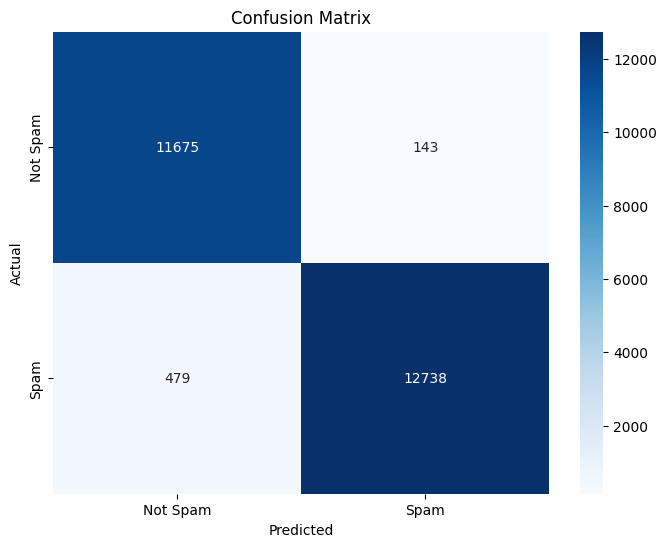

In [ ]:
y_pred = nb_model.predict(X_test_tfidf)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the classification report
print(report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
##Approach 2

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
sample_data =  pd.read_csv("combined_data.csv")

In [ ]:
sample_data

,label,text,text_length
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362
...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589
83444,1,now you can order software on cd or download i...,616
83445,1,dear valued member canadianpharmacy provides a...,534
83446,0,subscribe change profile contact us long term ...,2113


In [ ]:
sample_data['label'] = sample_data['label'].replace(1,'spam')
sample_data['label'] = sample_data['label'].replace(0,'spam')

In [ ]:
sample_data

,label,text,text_length
0,spam,ounce feather bowl hummingbird opec moment ala...,148
1,spam,wulvob get your medircations online qnb ikud v...,808
2,spam,computer connection from cnn com wednesday es...,2235
3,spam,university degree obtain a prosperous future m...,592
4,spam,thanks for all your answers guys i know i shou...,1362
...,...,...,...
83443,spam,hi given a date how do i get the last date of ...,2589
83444,spam,now you can order software on cd or download i...,616
83445,spam,dear valued member canadianpharmacy provides a...,534
83446,spam,subscribe change profile contact us long term ...,2113


In [ ]:
cv = CountVectorizer(min_df=.02)
vectorized_data = cv.fit_transform(list(sample_data['text']))

In [ ]:
vectorized_data.toarray().shape

(83448, 967)

In [ ]:
col = cv.get_feature_names_out()
col

array(['00', '000', '01', '02', '03', '04', '05', '08', '09', '10', '100',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '2000',
       '2001', '21', '24', '25', '27', '30', '50', '713', 'able', 'about',
       'above', 'access', 'according', 'account', 'across', 'act',
       'action', 'actually', 'add', 'added', 'addition', 'additional',
       'address', 'adobe', 'advertisement', 'advice', 'after', 'again',
       'against', 'ago', 'agreed', 'agreement', 'al', 'alert', 'all',
       'allow', 'almost', 'along', 'already', 'also', 'alternative',
       'always', 'am', 'america', 'american', 'among', 'amount', 'an',
       'analysis', 'and', 'announced', 'another', 'answer', 'any',
       'anyone', 'anything', 'application', 'approval', 'approved', 'apr',
       'april', 'are', 'area', 'around', 'as', 'ask', 'asked', 'at',
       'attached', 'attention', 'author', 'available', 'away', 'back',
       'bad', 'bank', 'base', 'based', 'be', 'because', 'become', 'been',

In [ ]:
x = pd.DataFrame(data=vectorized_data.toarray(),columns=col)
y = sample_data['label']

In [ ]:
x

,00,000,01,02,03,04,05,08,09,10,...,yahoo,year,years,yes,yet,york,you,your,yours,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83443,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
83444,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
83445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,1,0
83446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=56)

In [ ]:
Rc = RandomForestClassifier()
Rc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
preds = Rc.predict(x_test)

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        spam       1.00      1.00      1.00     25035

    accuracy                           1.00     25035
   macro avg       1.00      1.00      1.00     25035
weighted avg       1.00      1.00      1.00     25035



In [ ]:
text = "ACTION REQUIRED. Please verify your Bank of America account information to avoid a hold on your account. Click here to confirm: [Link]"

In [ ]:
testtext = cv.transform([text])

In [ ]:
Rc.predict(testtext)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['spam'], dtype=object)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
predst = dt.predict(x_test)

In [ ]:
print(classification_report(y_test,predst))

              precision    recall  f1-score   support

        spam       1.00      1.00      1.00     25035

    accuracy                           1.00     25035
   macro avg       1.00      1.00      1.00     25035
weighted avg       1.00      1.00      1.00     25035



In [ ]:
textt = "Hey, it's [Boss Name]. I'm in a meeting now and need your help with something urgent. Can you transfer $5,000 to this account ASAP? I'll explain everything later. Please keep this confidential."

In [ ]:
testtextt = cv.transform([textt])

In [ ]:
dt.predict(testtextt)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['spam'], dtype=object)

In [ ]:
##Step-by-Step codes for all options

In [ ]:
### a) Binary BOWs

In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

data2 = pd.read_csv("combined_data.csv")


def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    tokens = word_tokenize(text)     # Tokenization

    stop_words = set(stopwords.words('english'))      # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    stemmer = PorterStemmer()     # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    preprocessed_text = ' '.join(stemmed_tokens)      # Join stemmed tokens back into a string
    return preprocessed_text

data2['text'] = data2['text'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(data2['text'], data2['label'], test_size=0.2, random_state=42)    #Split the dataset into training and testing set

vectorizer = CountVectorizer(binary=True)      #Vectorize the text data into binary BOW representation
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

classifier = LogisticRegression()         ##Train a classifier using LogRegression
classifier.fit(X_train_bow, y_train)

y_pred = classifier.predict(X_test_bow)      #Evaluate / predicting the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7938
           1       0.98      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
##b) tf-idf BOWs

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

data3 = pd.read_csv("combined_data.csv")

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))

    tokens = [word for word in tokens if word not in stop_words]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

data3['text'] = data3['text'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(data3['text'], data3['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7938
           1       0.98      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690



In [ ]:
##c)Word vectors where a sequence (i.e. document) is represented by an average vector of the word vectors in the sequence

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

data4 = pd.read_csv("combined_data.csv")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

data4['tokens'] = data4['text'].apply(preprocess_text)

word2vec_model = Word2Vec(sentences=data4['tokens'], vector_size=100, window=5, min_count=1, workers=4)   # Train Word2Vec model

def document_vector(word2vec_model, doc_tokens):
    doc_vectors = [word2vec_model.wv[word] for word in doc_tokens if word in word2vec_model.wv]
    if len(doc_vectors) > 0:
        return np.mean(doc_vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

data4['avg_word_vector'] = data4['tokens'].apply(lambda x: document_vector(word2vec_model, x))

# Convert 'avg_word_vector' column to a list of arrays
X = data4['avg_word_vector'].tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, data4['label'], test_size=0.2, random_state=42)

# Convert X_train and X_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7938
           1       0.97      0.97      0.97      8752

    accuracy                           0.97     16690
   macro avg       0.97      0.97      0.97     16690
weighted avg       0.97      0.97      0.97     16690



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
##d) same as c) but now the document vector is a tf-idf weighted average of the word vectors for the words present in the sequence

##it takes a lot of time to run the next cell code min an hour

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import gensim.downloader as api
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

data5 = pd.read_csv("combined_data.csv")

def preprocess_text(text):

    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

data5['tokenized_text'] = data5['text'].apply(preprocess_text)

word2vec_model = api.load("glove-wiki-gigaword-300")

def calculate_document_vectors(text_data, word2vec_model):

    tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)

    tfidf_vectors = tfidf_vectorizer.fit_transform(text_data)

    document_vectors = []
    for i in range(len(text_data)):
        document_vector = tfidf_weighted_avg(text_data[i], tfidf_vectorizer, word2vec_model)
        document_vectors.append(document_vector)
    return document_vectors

def tfidf_weighted_avg(tokens, tfidf_vectorizer, word2vec_model):
    word_vectors = []
    for token in tokens:
        if token in word2vec_model.key_to_index:  # Check if token exists in the model
            word_vector = word2vec_model.get_vector(token)
            word_vectors.append(word_vector * tfidf_vectorizer.idf_[tfidf_vectorizer.vocabulary_[token]])
    if word_vectors:
        return sum(word_vectors) / len(word_vectors)
    else:
        return None

data5['document_vector'] = calculate_document_vectors(data5['tokenized_text'], word2vec_model)

X_train, X_test, y_train, y_test = train_test_split(data5['document_vector'], data5['label'], test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train.tolist(), y_train)

y_pred = classifier.predict(X_test.tolist())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
##e) document vector using the Doc2Vec algorithm

In [ ]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the dataset
data5 = pd.read_csv("combined_data.csv")

# Preprocess the text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

data5['tokens'] = data5['text'].apply(preprocess_text)

tagged_data = [TaggedDocument(words=row['tokens'], tags=[str(i)]) for i, row in data5.iterrows()]
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

data5['doc_vectors'] = data5['tokens'].apply(lambda x: doc2vec_model.infer_vector(x))

X_train, X_test, y_train, y_test = train_test_split(data5['doc_vectors'].tolist(), data5['label'], test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.77      0.82      7938
           1       0.81      0.91      0.86      8752

    accuracy                           0.84     16690
   macro avg       0.85      0.84      0.84     16690
weighted avg       0.84      0.84      0.84     16690

